In [47]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt

In [48]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [49]:
train_X.shape

(60000, 28, 28)

In [50]:
train_y[0]

9

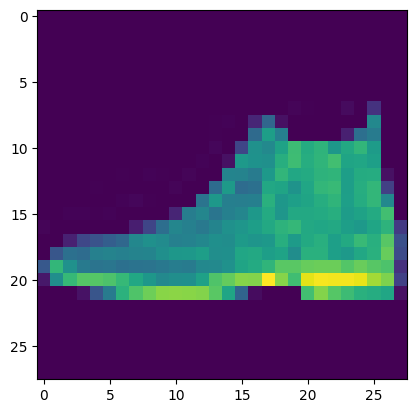

In [51]:
plt.imshow(test_X[0,...])

In [52]:
test_y.shape

(10000,)

### Class Examples

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

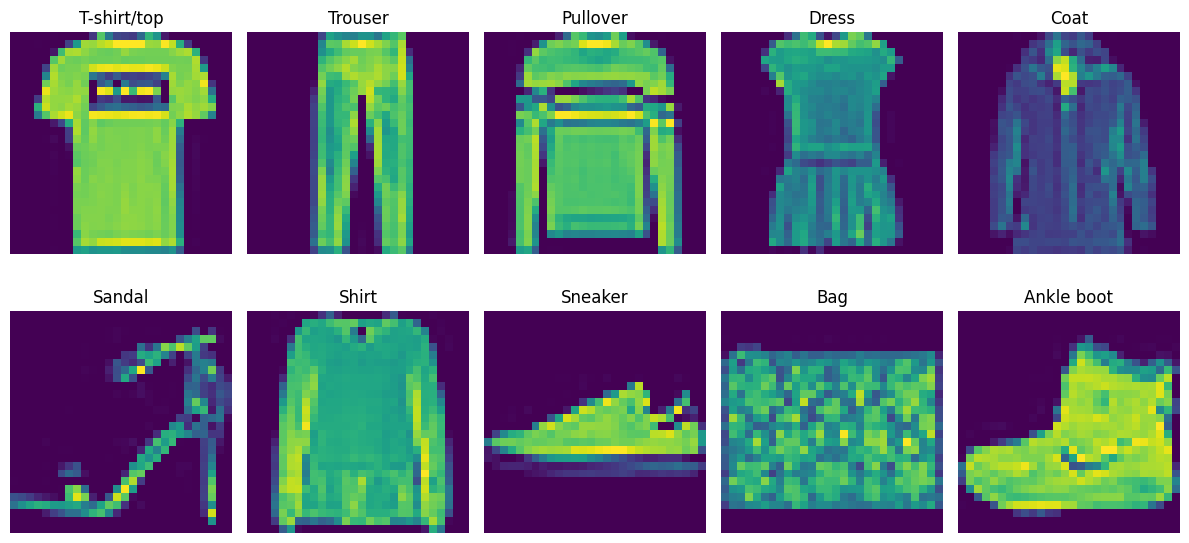

In [54]:
num_images = len(set(train_y))
num_rows = 2
num_cols = num_images // num_rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if it's more than 1D
if num_rows > 1:
    axes = axes.flatten()

# Loop through the images and plot on each subplot
for i in range(num_images):
    ax = axes[i]
    ax.imshow(train_X[np.where(train_y == i)[0][0]])
    ax.axis('off')

    # Set the title for the current subplot
    title = class_names[i]
    ax.set_title(title)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Class Distribution

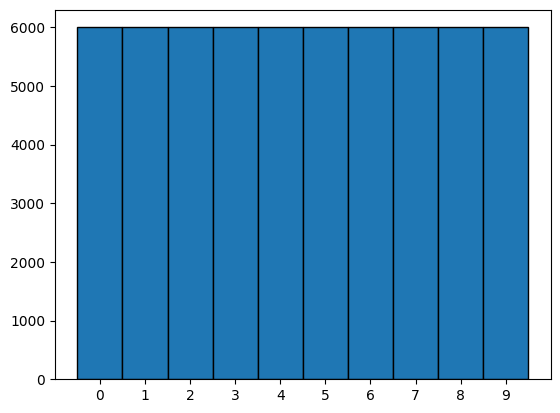

In [55]:
plt.hist(train_y, bins=np.arange(len(set(train_y))+1)-0.5, ec='black')
plt.xticks(range(len(set(train_y))))
plt.show()

### Pixel Intensity Distribution

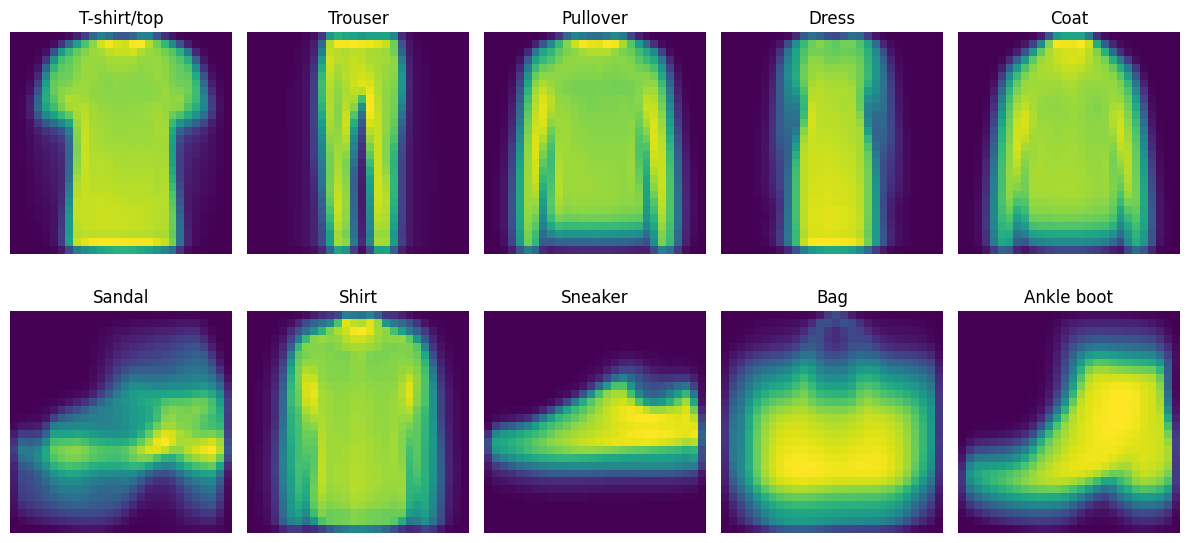

In [56]:
class_intensity = []
for i in set(train_y):    
    class_intensity += [train_X[np.where(train_y == i)].sum(axis=0)]

num_images = len(class_intensity)
num_rows = 2
num_cols = num_images // num_rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if it's more than 1D
if num_rows > 1:
    axes = axes.flatten()

# Loop through the images and plot on each subplot
for i in range(num_images):
    ax = axes[i]
    ax.imshow(class_intensity[i])
    ax.axis('off')

    # Set the title for the current subplot
    title = class_names[i]
    ax.set_title(title)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Sparse arrays

In [57]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [58]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [59]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [60]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Models

In [61]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

### Softmax Regression

In [62]:
model = Sequential()

In [63]:
model.add(Flatten(input_shape=(28,28)))

In [64]:
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.0001), metrics=["accuracy"])

In [67]:
history = model.fit(x=train_X, y=y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 11.3510 - accuracy: 0.6775 - val_loss: 6.1510 - val_accuracy: 0.7165
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 4.0797 - accuracy: 0.7317 - val_loss: 3.2269 - val_accuracy: 0.6988
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 2.3491 - accuracy: 0.7125 - val_loss: 2.2299 - val_accuracy: 0.6449
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7324 - accuracy: 0.7085 - val_loss: 1.6749 - val_accuracy: 0.6992
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.4446 - accuracy: 0.7187 - val_loss: 1.4530 - val_accuracy: 0.7086
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 1.2776 - accuracy: 0.7251 - val_loss: 1.3246 - val_accuracy: 0.7000
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1619 - accuracy: 0.7304 - val_loss: 1.1987 - val_accuracy: 0.7174
Epo

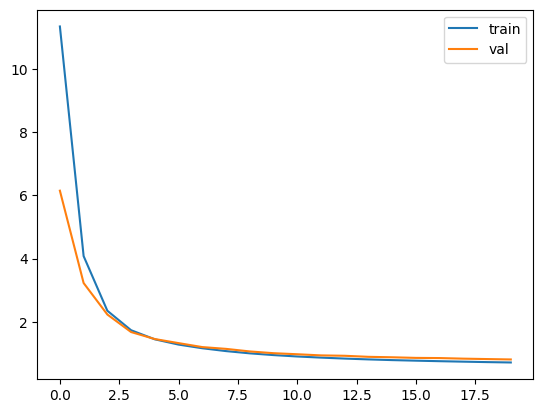

In [68]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

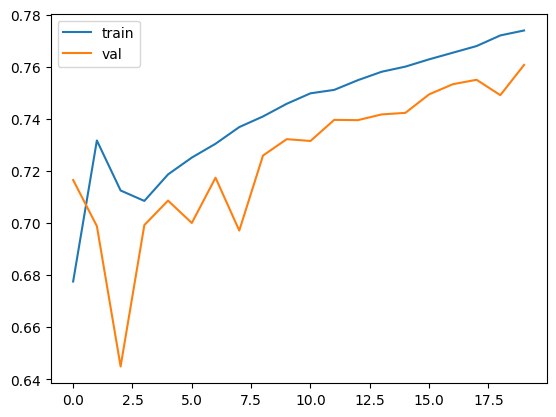

In [69]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()